In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

In [3]:
save_plots = True

# load results_summary.txt file

In [4]:
exp_name = 'toy_neurips'
plot_dir = exp_name+'_plots/'
if(save_plots):
    if (not os.path.isdir(plot_dir)):
        os.mkdir(plot_dir)
        
results_name = "/media/common/"+exp_name+"/results_summary.txt"
configs_name = "/media/common/"+ exp_name+"/configs_sorted.txt"
results_file = open(results_name,'r+')
results_lines= results_file.read().splitlines()

In [5]:
def get_col_names(results_lines,mode):
    breaks = []
    for i,line in enumerate(results_lines):
        if(line==''):
            breaks.append(i)
    if(mode=='train'):
        start_idx = 3
    elif(mode=='val'):
        start_idx = breaks[0]+2
    elif(mode=='test'):
        start_idx = breaks[1]+2
    else:
        raise Exception('mode must be train,val, or test')
        
    metrics = results_lines[start_idx].split('|')[1:]
    col_names = [m.strip() for m in metrics]
    col_names_all = []
    for i,name in enumerate(col_names):
        col_names_all.append(name)
        col_names_all.append(name+'_stderr')
    col_names_all.insert(0,'idx')
    return col_names_all

In [6]:
breaks = []
for i,line in enumerate(results_lines):
    if(line==''):
        breaks.append(i)

train_idx = range(5,breaks[0])
val_idx = range(breaks[0]+4,breaks[1])
test_idx = range(breaks[1]+4,breaks[2])

train_results = [results_lines[i] for i in train_idx]
val_results = [results_lines[i] for i in val_idx]
test_results = [results_lines[i] for i in test_idx]

In [7]:
len(train_results),len(val_results),len(test_results)

(1188, 1188, 1188)

In [8]:
def process_result(result):
    result_processed = []
    result_arr = result.split('|')
    result_processed.append(int(result_arr[0].strip()))
    for r in result_arr[1:]:
        arr = r.split('(')
        result_processed.append(float(arr[0].strip()))
        result_processed.append(float(arr[1].split(')')[0]))
    return result_processed

In [9]:
def make_df(col_names_all,results):
    d = []
    for result in results:
        arr = process_result(result)
        d.append(arr)
    return pd.DataFrame(d,columns=col_names_all)

In [10]:
col_names_train = get_col_names(results_lines,'train')
col_names_val = get_col_names(results_lines,'val')
col_names_test = get_col_names(results_lines,'test')

train_df = make_df(col_names_train,train_results)
val_df = make_df(col_names_val,val_results)
test_df = make_df(col_names_test,test_results)

In [11]:
test_df.head()

,idx,Pehe,Pehe_stderr,Bias_ate,Bias_ate_stderr,Rmse_fact,Rmse_fact_stderr,Rmse_ite,Rmse_ite_stderr,Pehe_nn,...,Bias_ate_DR_OW,Bias_ate_DR_OW_stderr,Pehe_nn_IPW,Pehe_nn_IPW_stderr,Pehe_nn_TIPW,Pehe_nn_TIPW_stderr,Pehe_nn_MW,Pehe_nn_MW_stderr,Pehe_nn_OW,Pehe_nn_OW_stderr
0,163,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.069,0.018,0.098,0.017,0.098,0.017,0.098,0.017,0.098,0.017
1,228,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.069,0.018,0.098,0.017,0.098,0.017,0.098,0.017,0.098,0.017
2,365,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.069,0.018,0.098,0.017,0.098,0.017,0.098,0.017,0.098,0.017
3,1007,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.069,0.018,0.098,0.017,0.098,0.017,0.098,0.017,0.098,0.017
4,1145,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.069,0.018,0.098,0.017,0.098,0.017,0.098,0.017,0.098,0.017


# load configs_sorted.txt file

In [12]:
configs_file = open(configs_name,'r+')
configs_lines= configs_file.read().splitlines()

In [13]:
def process_config(config):
    arr = config.split(',')
    d = {}
    for el in arr:
        k,v = el.split('=')
        try:
            v = float(v)
        except:
            v = v
        d[k.strip()] = v
    return d

l = []
for config in configs_lines:
    l.append(list(process_config(config).values()))
    
l = list(map(list, zip(*l)))

In [14]:
col_names = list(process_config(configs_lines[0]).keys())

In [15]:
for i,el in enumerate(l):
    train_df[col_names[i]] = el
    val_df[col_names[i]] = el
    test_df[col_names[i]] = el

In [16]:
test_df.head()

,idx,Pehe,Pehe_stderr,Bias_ate,Bias_ate_stderr,Rmse_fact,Rmse_fact_stderr,Rmse_ite,Rmse_ite_stderr,Pehe_nn,...,Pehe_nn_IPW_stderr,Pehe_nn_TIPW,Pehe_nn_TIPW_stderr,Pehe_nn_MW,Pehe_nn_MW_stderr,Pehe_nn_OW,Pehe_nn_OW_stderr,datadir,weight_scheme,p_alpha
0,163,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.017,0.098,0.017,0.098,0.017,0.098,0.017,../datasets/toy_data_SNR_2/A_0.0_1.00/,ParetoIPW,10.0
1,228,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.017,0.098,0.017,0.098,0.017,0.098,0.017,../datasets/toy_data_SNR_2/B_0.0_1.00/,ParetoIPW,10.0
2,365,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.017,0.098,0.017,0.098,0.017,0.098,0.017,../datasets/toy_data_SNR_2/B_0.0_1.00/,TruncIPW,10.0
3,1007,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.017,0.098,0.017,0.098,0.017,0.098,0.017,../datasets/toy_data_SNR_2/A_0.0_1.00/,TruncIPW,10.0
4,1145,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.017,0.098,0.017,0.098,0.017,0.098,0.017,../datasets/toy_data_SNR_2/B_0.0_1.00/,IPW,10.0


In [17]:
def add_sc_gamma(df):
    datadirs = df['datadir']
    l = []
    for d in datadirs:
        sc_gamma = d.split('/')[-2]
        sc = sc_gamma.split('_')[0]
        gamma = float(sc_gamma.split('_')[1])
        SNR = float(sc_gamma.split('_')[2])
        l.append([sc,gamma,SNR])
        
    l = list(map(list, zip(*l)))
    df['sc'] = l[0]
    df['gamma'] = l[1]
    df['SNR'] = l[2]

In [18]:
add_sc_gamma(train_df)
add_sc_gamma(val_df)
add_sc_gamma(test_df)

In [19]:
test_df.head()

,idx,Pehe,Pehe_stderr,Bias_ate,Bias_ate_stderr,Rmse_fact,Rmse_fact_stderr,Rmse_ite,Rmse_ite_stderr,Pehe_nn,...,Pehe_nn_MW,Pehe_nn_MW_stderr,Pehe_nn_OW,Pehe_nn_OW_stderr,datadir,weight_scheme,p_alpha,sc,gamma,SNR
0,163,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.098,0.017,0.098,0.017,../datasets/toy_data_SNR_2/A_0.0_1.00/,ParetoIPW,10.0,A,0.0,1.0
1,228,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.098,0.017,0.098,0.017,../datasets/toy_data_SNR_2/B_0.0_1.00/,ParetoIPW,10.0,B,0.0,1.0
2,365,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.098,0.017,0.098,0.017,../datasets/toy_data_SNR_2/B_0.0_1.00/,TruncIPW,10.0,B,0.0,1.0
3,1007,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.098,0.017,0.098,0.017,../datasets/toy_data_SNR_2/A_0.0_1.00/,TruncIPW,10.0,A,0.0,1.0
4,1145,0.239,0.012,0.107,0.026,1.116,0.014,1.121,0.013,1.941,...,0.098,0.017,0.098,0.017,../datasets/toy_data_SNR_2/B_0.0_1.00/,IPW,10.0,B,0.0,1.0


In [20]:
train_df = train_df.loc[:,~train_df.columns.duplicated()]
val_df = val_df.loc[:,~val_df.columns.duplicated()]
test_df = test_df.loc[:,~test_df.columns.duplicated()]

# Clean min plot (NeurIPS)

In [21]:
def get_min_metrics(sc,SNR,metric,df,metric_sel='Pehe'):
    groups = df.groupby(['weight_scheme','sc','gamma','SNR'])
    weight_schemes = np.unique(df['weight_scheme'])
    gammas = np.unique(df['gamma'])
    mins = {}
    errs = {}
    for weight_scheme in weight_schemes:
        all_vals = [groups.get_group((weight_scheme,sc,gamma,SNR))[metric] for gamma in np.unique(df['gamma'])]
        all_errs = [groups.get_group((weight_scheme,sc,gamma,SNR))[metric+'_stderr'] for gamma in np.unique(df['gamma'])]
        all_vals_sel = [groups.get_group((weight_scheme,sc,gamma,SNR))[metric_sel] for gamma in np.unique(df['gamma'])]
        argmins = [np.argmin(all_vals_sel[i]) for i in range(len(all_vals))]
        mins[weight_scheme] = [all_vals[i][argmins[i]] for i in range(len(all_vals))]
        errs[weight_scheme] = [all_errs[i][argmins[i]] for i in range(len(all_errs))]
    
    return gammas,mins,errs

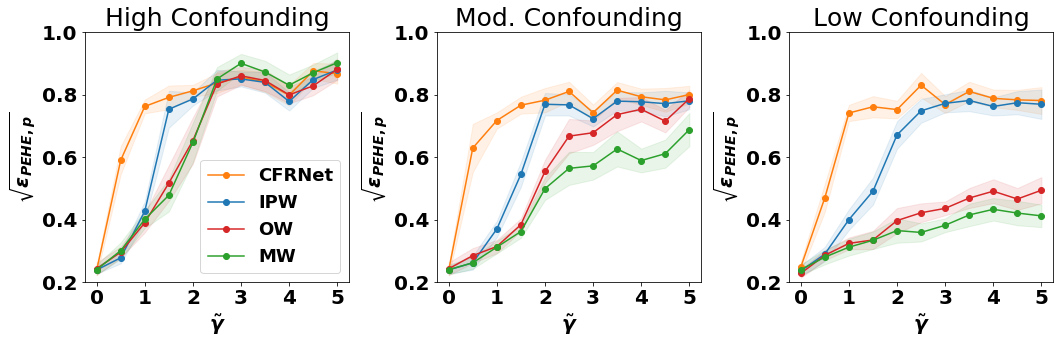

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
SNR = 1.0
weight_schemes = ['JW','IPW','OW','MW']
cols = ['High Confounding','Mod. Confounding','Low Confounding']
legend_map = {'JW':'CFRNet','IPW':'IPW','OW':'OW','MW':'MW','TruncIPW':'TruncIPW'}
color_map = {'IPW':'tab:blue','JW':'tab:orange','MW':'tab:green','OW':'tab:red','ParetoIPW':'tab:purple','TruncIPW':'tab:brown'}
for j,sc in enumerate(['A','B','C']):
    gammas,mins, errs = get_min_metrics(sc=sc,SNR=SNR,metric='Pehe',df=test_df)
    axes[j].set_ylim((0.2,0.95))
    axes[j].set_ylabel(r'$\sqrt{\epsilon_{PEHE,p}}$',fontsize=20)
    axes[j].set_xlabel(r'$\tilde{\gamma}$',fontsize=20)
    axes[j].tick_params(axis="x", labelsize=20)
    axes[j].tick_params(axis="y", labelsize=20)
    axes[j].set_xticks(np.arange(6))
    axes[j].set_yticks(np.arange(0.2,1.2,0.2))
#     axes[j].set_xticklabels([0,1,2,3,4,5],fontsize=20) 
    for w in weight_schemes:
        val = np.array(mins[w])
        err = np.array(errs[w])
        axes[j].plot(gammas,val,label=legend_map[w],color = color_map[w],marker='o')
        axes[j].fill_between(gammas,val-err,val+err,color=color_map[w],alpha=0.1)
#         axes[j].errorbar(gammas,mins[w],color=color_map[w],yerr=errs[w],fmt='none',alpha=0.5)
        axes[j].set_title(cols[j],fontsize=25)
axes[0].legend(fontsize=18)
fig.tight_layout()
plt.subplots_adjust(wspace=0.33, hspace=0)

# Clean IPM ablation (NeurIPS)

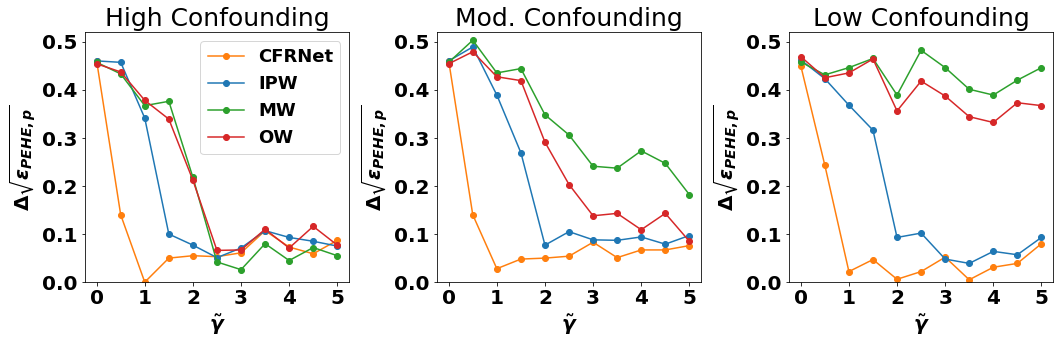

In [23]:
color_map = {'IPW':'tab:blue','JW':'tab:orange','MW':'tab:green','OW':'tab:red','TruncIPW':'tab:brown'}
label_map = {'Pehe':r'$\epsilon_{PEHE}$','Bias_ate': r'$\epsilon_{ATE}$'}
groups = test_df.groupby(['weight_scheme','sc','p_alpha','SNR'])   
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
SNR = 1.0
cols = ['High Confounding','Mod. Confounding','Low Confounding']
# weight_schemes = ['JW','IPW','ParetoIPW','MW','OW','TruncIPW']
weight_schemes = ['JW','IPW','MW','OW']
label_map = {'JW':'CFRNet','IPW':'IPW','MW':'MW','OW':'OW','TruncIPW':'TruncIPW'}
eval_map = {'JW':'','IPW':'_IPW','MW':'_MW','OW':'_OW','TruncIPW':'_TIPW'}
metric = 'Pehe'
for j,sc in enumerate(['A','B','C']):
    gammas,vals,stderrs = get_min_metrics(sc,SNR,metric=metric,df=test_df)
    for i,weight_scheme in enumerate(weight_schemes):
        subdf = groups.get_group((weight_scheme,sc,0.0,SNR))
        vals_noIPM = np.array(subdf[metric])
        axes[j].plot(gammas,vals_noIPM-vals[weight_scheme],color=color_map[weight_scheme],label=label_map[weight_scheme],marker='o')
        axes[j].set_xlabel(r'$\tilde{\gamma}$',fontsize=20)
        axes[j].set_ylabel(r'$\Delta\sqrt{\epsilon_{PEHE,p}}$',fontsize=20)
        axes[j].set_ylim([0.0,0.52])
        axes[j].tick_params(axis="x", labelsize=20)
        axes[j].tick_params(axis="y", labelsize=20)
        axes[j].set_xticks(np.arange(6))
        axes[j].set_title(cols[j],fontsize=25)
axes[0].legend(fontsize=18)
fig.tight_layout()
plt.subplots_adjust(wspace=0.33, hspace=0)

# Clean pehe,g plots (NeurIPS)

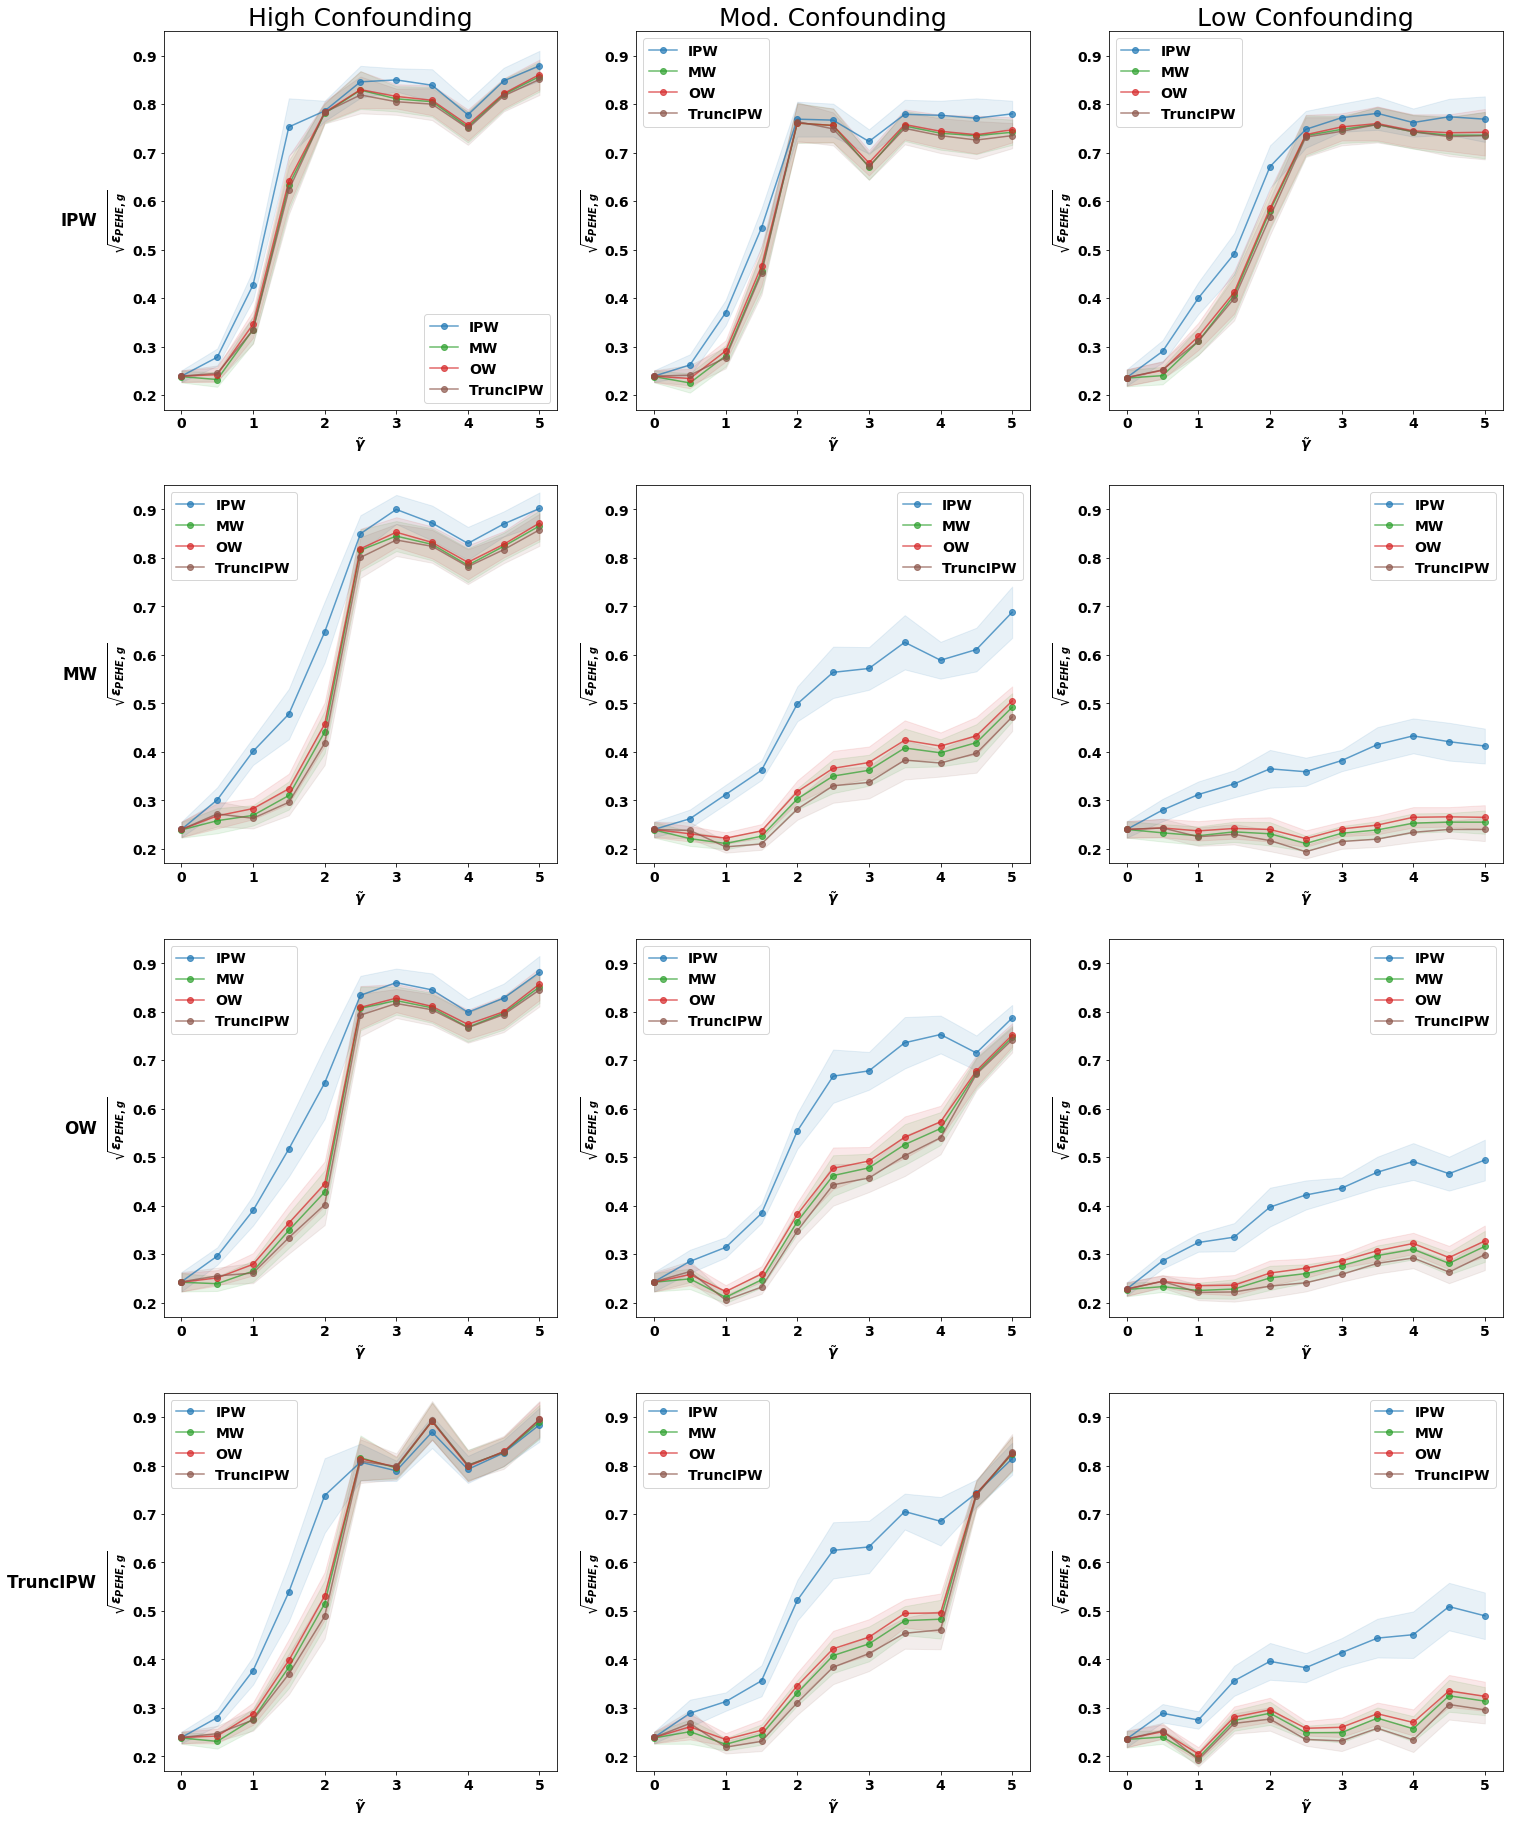

In [24]:
SNR = 1.0
df = test_df
groups = df.groupby(['weight_scheme','sc','gamma','SNR'])
cols = ['High Confounding','Mod. Confounding','Low Confounding']
legend_map = {'JW':'CFRNet','IPW':'IPW','OW':'OW','MW':'MW','TIPW':'TruncIPW'}
weight_schemes = ['IPW','MW','OW','TIPW']
color_map = {'IPW':'tab:blue','JW':'tab:orange','MW':'tab:green','OW':'tab:red','ParetoIPW':'tab:purple','TIPW':'tab:brown'}
train_scheme_map = {'JW':'JW','IPW':'IPW','MW':'MW','OW':'OW','TIPW':'TruncIPW','PIPW':'ParetoIPW'}
eval_scheme_map = {'JW':'IPW','IPW':'IPW','MW':'MW','OW':'OW','TIPW':'TIPW','PIPW':'IPW'}
fig, axes = plt.subplots(nrows=len(weight_schemes), ncols=3,figsize=(24,32))
for i,sc in enumerate(['A','B','C']):
    for j,train_scheme_ in enumerate(weight_schemes):
        for k,eval_scheme_ in enumerate(weight_schemes):
            train_scheme = train_scheme_map[train_scheme_]
            eval_scheme = eval_scheme_map[eval_scheme_]
            metric = 'Pehe_'+eval_scheme
            gammas,mins,errs = get_min_metrics(sc,SNR,metric,test_df)
            val = np.array(mins[train_scheme])
            err = np.array(errs[train_scheme])
            c = color_map[eval_scheme_]
            axes[0][i].set_title(cols[i],fontsize=25)
            axes[j][i].plot(gammas,val,color=c,alpha=0.7,label=legend_map[eval_scheme_],marker='o')
#             axes[j][i].errorbar(gammas,mins[train_scheme],color=c,yerr=errs,fmt='none')
            axes[j][i].fill_between(gammas,val-err,val+err,color=c,alpha=0.1)
        axes[j][i].legend()
        axes[j][i].set_ylabel(r'$\sqrt{\epsilon_{PEHE,g}}$')
        axes[j][i].set_xlabel(r'$\tilde{\gamma}$')
        axes[j][i].set_ylim([0.17,0.95])
rows = ['IPW','MW','OW','TruncIPW']
pad = 5
for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
if(save_plots):
    plt.savefig(plot_dir+'flipped_weighted_pehe.png')

# Clean DR plots (NeurIPS)

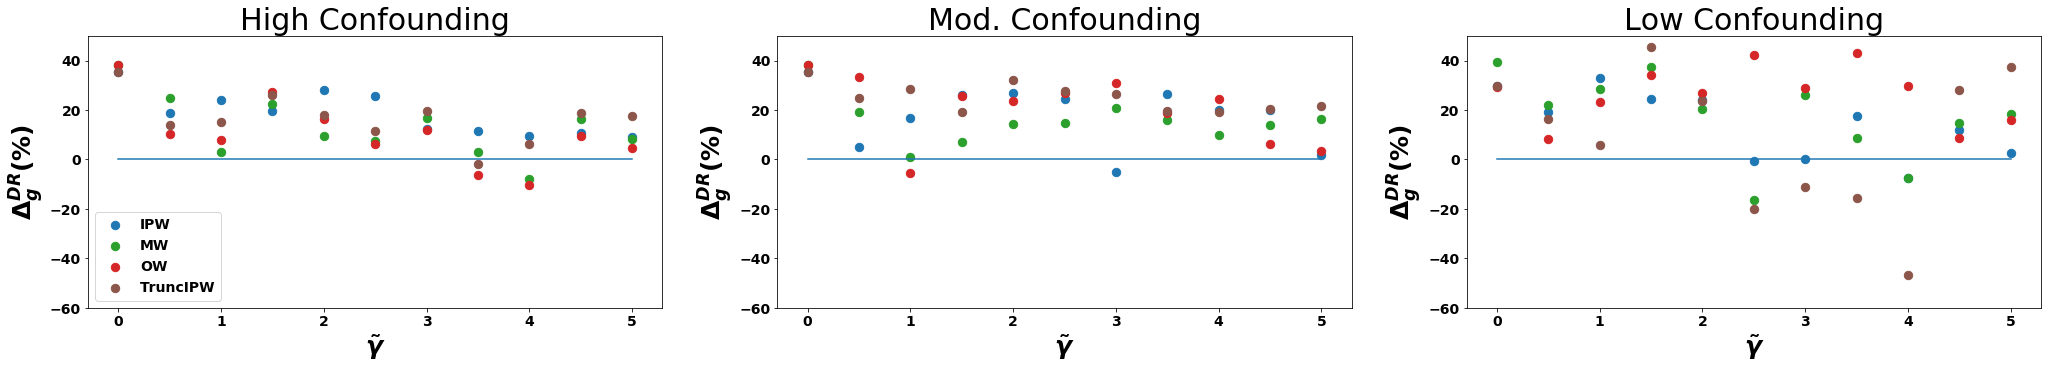

In [25]:
color_map = {'IPW':'tab:blue','JW':'tab:orange','MW':'tab:green','OW':'tab:red','ParetoIPW':'tab:purple','TruncIPW':'tab:brown'}
label_map = {'Pehe':r'$\epsilon_{PEHE}$','Bias_ate': r'$\epsilon_{ATE}$'}

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(35,5))
SNR = 1.0
weight_schemes = ['IPW','MW','OW','TIPW']
cols = ['High Confounding','Mod. Confounding','Low Confounding']
for j,sc in enumerate(['A','B','C']):
    for weight_scheme in weight_schemes:
    
        if(weight_scheme=='TIPW'):
            train_scheme = 'TruncIPW'
            eval_scheme = weight_scheme
        else:
            train_scheme = weight_scheme
            eval_scheme = weight_scheme
        
        gammas,vals,stderrs = get_min_metrics(sc,SNR,metric='Bias_ate_'+eval_scheme,df=test_df[test_df['weight_scheme']==train_scheme])
        _,vals_DR,stderrs_DR = get_min_metrics(sc,SNR,metric='Bias_ate_DR_'+eval_scheme,df=test_df[test_df['weight_scheme']==train_scheme])
        delta = (np.array(vals[train_scheme])-np.array(vals_DR[train_scheme]))/vals[train_scheme]
        axes[j].scatter(gammas,delta*100,color=color_map[train_scheme],label=train_scheme,s=70)
    axes[j].plot(gammas,np.zeros(gammas.shape))
    axes[j].set_xlabel(r'$\tilde{\gamma}$',fontsize=25)
    axes[j].set_ylabel(r'$\Delta_g^{DR} (\%)$',fontsize=25)
    axes[0].legend()
    axes[j].set_ylim([-60,50])
    axes[j].set_title(cols[j],fontsize=30)
pad = 1

if(save_plots):
    plt.savefig(plot_dir+'ate_dr.png')